## ARIMA 모델
ARIMA 모델은 시계열 데이터의 자기상관성, 이동평균성, 추세 변동을 모두 고려하여 데이터를 설명하고 예측하는 데 사용<br>
해당 모델은 자기회귀와 이동평균 모델을 결합하면서도 추세 변동 반영 가능. 차분 개념을 포함해 데이터의 비정상성을 제거하고 정상성을 가진 데이터로 변환.<br>
이 모델은 정상성을 가진 데이터에 적합하다. 따라서 정상성이 없을 경우 차분 과정을 통해 정상성을 확보한 후 모델을 적용한다.<br>
ARIMA(p, d, q) 모델에서는 p는 AR 모델의 차수, d는 차분의 차수, q는 MA 모델의 차수를 의미<br>
파라미터는 최소자승법, 최대 가능도 추정 등의 통계적 방법을 사용하여 추정.<br>
또한, ACF와 PACF를 통해 최적의 차수를 결정할 수 있다.
- 최대 가능도 추정은 주어진 데이터에 대해 모델의 파라미터 값을 찾는 과정으로, 가능도 함수를 최대화 하는 파라미터 값을 추정한다.

#### ARIMA 모델의 파라미터 추정
- 차분 : ARIMA 모델에서는 주어진 시계열 데이터가 정상성을 가지지 않을 수 있으므로, 먼저 데이터의 차분을 적용하여 정상성을 만든다.
- 초기 추정치 설정 : ARMA 모델의 차수 (p,q)와 차분(D)을 결저앟고 초기 파라미터 추정치를 설정한다.
- 최대 가능도 추정 : 초기 추정치를 기반으로 주어진 데이터의 로그 가능도 함수를 정의하고, 이를 최대화하는 파라미터 값을 찾는다. 이를 위해 수치적 최적화 알고리즘을 사용함<br>
파라미터 추정 과정에서는 주어진 데이터와 모델의 잔차(오차) 사이의 차이를 최소화 하는 방향으로 파라미터를 조정. 이를 통해 데이터에 가장 적합한 모델의 파라미터값을 찾아내고, 이를 기반으로 시계열 데이터의 예측을 수행함

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


# 시계열 데이터 생성
np.random.seed(0)
n = 100 # 데이터 포인트 수
ar_params = [0.7] # 자기회귀 계수
ma_params = [0.4, -0.2] # 이동평균 계수
residuals = np.random.normal(0, 1, n) # 잔차 생성

# ARMA(1, 2) 모델 생성
data = [0, 0]  # 초기값 설정
for i in range(2, n) :
    ar_term = ar_params[0] * data[i-1]
    ma_term = ma_params[0] * residuals[i-1] + ma_params[1] * residuals[i-2]
    data.append(ar_term+ ma_term + residuals[i])
    
# 데이터프레임 생성
df = pd.DataFrame({'Value' : data})

# 데이터 확인
print(df)

       Value
0   0.000000
1   0.000000
2   0.785990
3   3.102550
4   4.739953
..       ...
95  2.160229
96  1.734016
97  2.862567
98  2.842957
99  2.085650

[100 rows x 1 columns]


                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  100
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -140.937
Date:                Mon, 05 Jun 2023   AIC                            291.874
Time:                        01:21:43   BIC                            304.900
Sample:                             0   HQIC                           297.146
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1564      0.510      0.307      0.759      -0.842       1.155
ar.L1          0.7647      0.129      5.934      0.000       0.512       1.017
ma.L1          0.3757      0.158      2.382      0.0

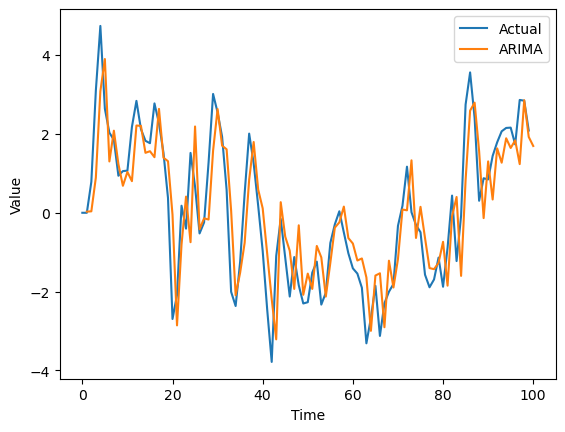

In [2]:
# ARIMA(1, 2) 모델 적합
model = ARIMA(df['Value'], order = (1, 0, 2))
# order = (1, 0, 2)는 AR, 차분, MA의 차수 의미. 여기서는 AR(1), MA(2) 모델을 사용하며, 차분은 수행하지 않음
results = model.fit()

# ARIMA 모델 정보 출력
print(results.summary())

# 예측 결과 그래프 출력
pred = results.predict(start = 1, end = n)
plt.plot(df['Value'], label = 'Actual')
plt.plot(pred, label = 'ARIMA')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

적합된 ARIMA 모델을 사용하여 예측을 수행하고, 실제 데이터와 예측 결과를 그래프로 출력함. 'Actual'은 실제 데이터를 나타내며, 'ARIMA'는 예측 결과를 나타낸다.